In [67]:
%pip install scikt-learn
%pip install matplotlib
%pip install pandas
%pip install tensorflow
%pip install tpot
%pip install seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.neural_network import MLPClassifier
from tpot import TPOTClassifier
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikt-learn (from versions: none)
ERROR: No matching distribution found for scikt-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [68]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


Note: you may need to restart the kernel to use updated packages.
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census databa

In [69]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [70]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [71]:
z = pd.concat([X, y], axis=1)
z

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [72]:
z.shape

(48842, 15)

In [73]:
# We concatenate the X and y dataframes to recreate the single dataframe just to "clean" the row data empity values
# and we exclude the 'fnlwgt' column because it is not relevant for the prediction

z.isnull().sum()
z = z.fillna('None')

z = z.drop(z.loc[(z['workclass'] == 'None')].index)
z = z.drop(z.loc[(z['occupation'] == 'None')].index)
z = z.drop(z.loc[(z['native-country'] == 'None')].index)
#z = z.drop(columns=['fnlwgt'])

print(z.shape)

(47621, 15)


In [74]:
# We verified the values of the 'income' column needed ajustment

z.loc[z['income'] == '<=50K.', 'income'] = '<=50K'
z.loc[z['income'] == '>50K.', 'income'] = '>50K'
agrupado_y = z.groupby('income').size()
agrupado_y

income
<=50K    36080
>50K     11541
dtype: int64

In [75]:
X = z.iloc[:, :-1]
y = z.iloc[:, -1]

In [76]:
# We'll check if there are any missing values in the dataset
# If there are, we'll replace them with the most common value in the column (in case of categorical variables) 
# or the mean (in case of numerical variables)

X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [77]:
y.isnull().sum()

np.int64(0)

In [78]:
# Now we'll check if there any variable with strange value/meaning in each column
# In this case we find some '?' in the columns 'workclass', 'occupation' and 'native-country'
# and we'll replace them with 'Others' as  not expression values

X.loc[X['workclass'] == '?', 'workclass'] = 'Others'
#X.loc[X['workclass'] == 'Never-worked', 'workclass'] = 'Others'
#X.loc[X['workclass'] == 'Without-pay', 'workclass'] = 'Others'

agrupado_workclass = X.groupby(['workclass']).size()
agrupado_workclass

workclass
Federal-gov          1423
Local-gov            3126
Never-worked            7
Others               1836
Private             33717
Self-emp-inc         1688
Self-emp-not-inc     3838
State-gov            1965
Without-pay            21
dtype: int64

In [79]:
# We transform all the column values in dummies variables to make the model more accurate

get_workclass = pd.get_dummies(X['workclass'], prefix = 'workclass')
get_workclass

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Others,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
48836,False,False,False,False,True,False,False,False,False
48837,False,False,False,False,True,False,False,False,False
48839,False,False,False,False,True,False,False,False,False
48840,False,False,False,False,True,False,False,False,False


In [80]:
X.loc[X['occupation'] == '?', 'occupation'] = 'Other-service'
#X.loc[X['occupation'] == 'Armed-Forces', 'occupation'] = 'Other-service'
#X.loc[X['occupation'] == 'Priv-house-serv', 'occupation'] = 'Other-service'
#X.loc[X['occupation'] == 'Protective-serv', 'occupation'] = 'Other-service'
agrupado_occupation = X.groupby(['occupation']).size()
agrupado_occupation

occupation
Adm-clerical         5589
Armed-Forces           14
Craft-repair         6089
Exec-managerial      6058
Farming-fishing      1485
Handlers-cleaners    2066
Machine-op-inspct    3006
Other-service        6734
Priv-house-serv       238
Prof-specialty       6110
Protective-serv       981
Sales                5474
Tech-support         1436
Transport-moving     2341
dtype: int64

In [81]:
get_occupation = pd.get_dummies(X['occupation'], prefix = 'occupation')
get_occupation

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,False,False,False,False,False,False,False,False,False,True,False,False,False,False
48837,False,False,False,False,False,False,False,False,False,True,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,True,False,False,False,False
48840,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
# In 'native-country' behond the '?' we'll replace all the countries that are not United-States or Mexico with 'Others'

X.loc[X['native-country'] == '?', 'native-country'] = 'Others'

#for index, row in X.iterrows():
#  if row['native-country'] == 'United-States':
#    continue
#  elif row['native-country'] == 'Mexico':
#    continue
#  else:
#    X.at[index, 'native-country'] = 'Others'

agrupado_country = X.groupby(['native-country']).size()
agrupado_country

native-country
Cambodia                         27
Canada                          177
China                           120
Columbia                         85
Cuba                            136
Dominican-Republic              100
Ecuador                          44
El-Salvador                     153
England                         123
France                           38
Germany                         202
Greece                           49
Guatemala                        87
Haiti                            71
Holand-Netherlands                1
Honduras                         20
Hong                             29
Hungary                          18
India                           147
Iran                             57
Ireland                          36
Italy                           105
Jamaica                         104
Japan                            92
Laos                             22
Mexico                          936
Nicaragua                        49
Others       

In [83]:
get_native_country = pd.get_dummies(X['native-country'], prefix = 'native-country')
get_native_country

,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [84]:
agrupado_education = X.groupby(['education']).size()
agrupado_education

education
10th             1336
11th             1746
12th              633
1st-4th           239
5th-6th           494
7th-8th           912
9th               735
Assoc-acdm       1566
Assoc-voc        2034
Bachelors        7881
Doctorate         582
HS-grad         15444
Masters          2610
Preschool          78
Prof-school       819
Some-college    10512
dtype: int64

In [85]:
#X.loc[X['education-num'] == 10, 'education-num'] = 'Others'
#X.loc[X['education-num'].isin([1,2,3,4,5,6,7,8,9]), 'education-num'] = 'Basic-Level'
#X.loc[X['education-num'].isin([11,12,13,14,15,16]), 'education-num'] = 'High-Level'
agrupado_education_num = X.groupby(['education-num']).size()
agrupado_education_num

education-num
1        78
2       239
3       494
4       912
5       735
6      1336
7      1746
8       633
9     15444
10    10512
11     2034
12     1566
13     7881
14     2610
15      819
16      582
dtype: int64

In [86]:
get_education_num = pd.get_dummies(X['education-num'], prefix = 'education-num')
get_education_num

,education-num_1,education-num_2,education-num_3,education-num_4,education-num_5,education-num_6,education-num_7,education-num_8,education-num_9,education-num_10,education-num_11,education-num_12,education-num_13,education-num_14,education-num_15,education-num_16
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
48837,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [87]:
#X.loc[X['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Others'
#X.loc[X['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Others'
#X.loc[X['marital-status'] == 'Separated', 'marital-status'] = 'Others'
#X.loc[X['marital-status'] == 'Widowed ', 'marital-status'] = 'Others'
agrupado_marital_status = X.groupby(['marital-status']).size()
agrupado_marital_status

marital-status
Divorced                  6526
Married-AF-spouse           34
Married-civ-spouse       21966
Married-spouse-absent      600
Never-married            15555
Separated                 1497
Widowed                   1443
dtype: int64

In [88]:
get_marital_status = pd.get_dummies(X['marital-status'], prefix = 'marital-status')
get_marital_status

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
48836,False,False,False,False,True,False,False
48837,True,False,False,False,False,False,False
48839,False,False,True,False,False,False,False
48840,True,False,False,False,False,False,False


In [89]:
agrupado_relationship = X.groupby(['relationship']).size()
agrupado_relationship

relationship
Husband           19396
Not-in-family     12281
Other-relative     1441
Own-child          7228
Unmarried          5022
Wife               2253
dtype: int64

In [90]:
get_relationship = pd.get_dummies(X['relationship'], prefix = 'relationship')
get_relationship

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,False,True,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
48836,False,False,False,True,False,False
48837,False,True,False,False,False,False
48839,True,False,False,False,False,False
48840,False,False,False,True,False,False


In [91]:
#X.loc[X['race'] == 'Amer-Indian-Eskimo', 'race'] = 'Other'
#X.loc[X['race'] == 'Asian-Pac-Islander', 'race'] = 'Other'
agrupado_race = X.groupby(['race']).size()
agrupado_race

race
Amer-Indian-Eskimo      460
Asian-Pac-Islander     1447
Black                  4535
Other                   393
White                 40786
dtype: int64

In [92]:
get_race = pd.get_dummies(X['race'], prefix = 'race')
get_race

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
48836,False,False,False,False,True
48837,False,False,False,False,True
48839,False,False,False,False,True
48840,False,True,False,False,False


In [93]:
agrupado_sex = X.groupby(['sex']).size()
agrupado_sex

sex
Female    15684
Male      31937
dtype: int64

In [94]:
get_sex = pd.get_dummies(X['sex'], prefix = 'sex')
get_sex

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
48836,False,True
48837,True,False
48839,False,True
48840,False,True


In [95]:
# In 'capital-gain', as like 'capital loss' and 'hours-per-week', we'll group the value in smaller 'clusters' 
# to have a better understanding, minimizing the number of unique values and eliminating the outliers

#X['capital-gain'] = pd.to_numeric(X['capital-gain'], errors='coerce')
#for index, row in X.iterrows():
#  if 0 < row['capital-gain'] <= 100000:
#    X.at[index, 'capital-gain'] = 'Up to 100k'
#  elif row['capital-gain'] > 100000:
#    X.at[index, 'capital-gain'] = 'More than 100k'
#  else:
#    X.at[index, 'capital-gain'] = '0'

agrupado_capital_gain = X.groupby(['capital-gain']).size()
agrupado_capital_gain

capital-gain
0        43657
114          8
401          3
594         48
914         10
         ...  
25236       14
27828       58
34095        6
41310        3
99999      240
Length: 122, dtype: int64

In [96]:
get_capital_gain = pd.get_dummies(X['capital-gain'], prefix = 'capital-gain')
get_capital_gain

,capital-gain_0,capital-gain_114,capital-gain_401,capital-gain_594,capital-gain_914,capital-gain_991,capital-gain_1055,capital-gain_1086,capital-gain_1111,capital-gain_1151,...,capital-gain_15831,capital-gain_18481,capital-gain_20051,capital-gain_22040,capital-gain_25124,capital-gain_25236,capital-gain_27828,capital-gain_34095,capital-gain_41310,capital-gain_99999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48837,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48839,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
#X['capital-loss'] = pd.to_numeric(X['capital-loss'], errors='coerce')
#for index, row in X.iterrows():
#  if 0 < row['capital-loss'] <= 5000:
#    X.at[index, 'capital-loss'] = 'Up to 5k'
#  elif row['capital-loss'] > 5000:
#    X.at[index, 'capital-loss'] = 'More than 5k'
#  else:
#    X.at[index, 'capital-loss'] = '0'

agrupado_capital_loss = X.groupby(['capital-loss']).size()
agrupado_capital_loss

capital-loss
0       45389
155         1
213         5
323         5
419         3
        ...  
3175        2
3683        2
3770        4
3900        2
4356        3
Length: 98, dtype: int64

In [98]:
get_capital_loss = pd.get_dummies(X['capital-loss'], prefix = 'capital-loss')
get_capital_loss

,capital-loss_0,capital-loss_155,capital-loss_213,capital-loss_323,capital-loss_419,capital-loss_625,capital-loss_653,capital-loss_810,capital-loss_880,capital-loss_974,...,capital-loss_2559,capital-loss_2603,capital-loss_2754,capital-loss_2824,capital-loss_3004,capital-loss_3175,capital-loss_3683,capital-loss_3770,capital-loss_3900,capital-loss_4356
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48837,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48839,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48840,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
#X['hours-per-week'] = pd.to_numeric(X['hours-per-week'], errors='coerce')
#for index, row in X.iterrows():
#  if row['hours-per-week'] == 0:
#    X.at[index, 'hours-per-week'] = '0'
#  elif 0 < row['hours-per-week'] <= 40:
#    X.at[index, 'hours-per-week'] = 'Up to 40h'
#  elif row['hours-per-week'] > 40:
#    X.at[index, 'hours-per-week'] = 'More than 40h'

agrupado_hours_per_week = X.groupby(['hours-per-week']).size()
agrupado_hours_per_week

hours-per-week
1      25
2      41
3      50
4      74
5      82
     ... 
95      2
96      9
97      2
98     14
99    130
Length: 96, dtype: int64

In [100]:
get_hours_per_week = pd.get_dummies(X['hours-per-week'], prefix = 'hours-per-week')
get_hours_per_week

,hours-per-week_1,hours-per-week_2,hours-per-week_3,hours-per-week_4,hours-per-week_5,hours-per-week_6,hours-per-week_7,hours-per-week_8,hours-per-week_9,hours-per-week_10,...,hours-per-week_89,hours-per-week_90,hours-per-week_91,hours-per-week_92,hours-per-week_94,hours-per-week_95,hours-per-week_96,hours-per-week_97,hours-per-week_98,hours-per-week_99
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48837,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
# We'll standarlizer the numerical variables in a smaller range

standarscaler = StandardScaler()
numerical = X.select_dtypes(include=['int64','float64']).columns
X[numerical] = standarscaler.fit_transform(X[numerical])
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.026501,State-gov,-1.062924,Bachelors,1.132729,Never-married,Adm-clerical,Not-in-family,White,Male,0.144629,-0.217456,-0.048943,United-States
1,0.837781,Self-emp-not-inc,-1.008031,Bachelors,1.132729,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145735,-0.217456,-2.251188,United-States
2,-0.047252,Private,0.245517,HS-grad,-0.424726,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145735,-0.217456,-0.048943,United-States
3,1.059039,Private,0.426206,11th,-1.203454,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145735,-0.217456,-0.048943,United-States
4,-0.784780,Private,1.408394,Bachelors,1.132729,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145735,-0.217456,-0.048943,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,Private,0.525573,Bachelors,1.132729,Never-married,Prof-specialty,Own-child,White,Male,-0.145735,-0.217456,-0.048943,United-States
48837,0.026501,Private,0.243367,Bachelors,1.132729,Divorced,Prof-specialty,Not-in-family,White,Female,-0.145735,-0.217456,-0.375201,United-States
48839,-0.047252,Private,1.754843,Bachelors,1.132729,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.145735,-0.217456,0.766703,United-States
48840,0.395264,Private,-1.002537,Bachelors,1.132729,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.582847,-0.217456,-0.048943,United-States


In [102]:
# We transform categorical variables into numerical variables using the LabelEncoder, and we encode as well the X_ajusted and y dataframes

labelencoder = LabelEncoder()

X = X.drop(columns=['education-num'])

for column in X.select_dtypes(include=['object']).columns:
  X[column] = labelencoder.fit_transform(X[column])

X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.026501,7,-1.062924,9,4,0,1,4,1,0.144629,-0.217456,-0.048943,39
1,0.837781,6,-1.008031,9,2,3,0,4,1,-0.145735,-0.217456,-2.251188,39
2,-0.047252,4,0.245517,11,0,5,1,4,1,-0.145735,-0.217456,-0.048943,39
3,1.059039,4,0.426206,1,2,5,0,2,1,-0.145735,-0.217456,-0.048943,39
4,-0.784780,4,1.408394,9,2,9,5,2,0,-0.145735,-0.217456,-0.048943,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,4,0.525573,9,4,9,3,4,1,-0.145735,-0.217456,-0.048943,39
48837,0.026501,4,0.243367,9,0,9,1,4,0,-0.145735,-0.217456,-0.375201,39
48839,-0.047252,4,1.754843,9,2,9,0,4,1,-0.145735,-0.217456,0.766703,39
48840,0.395264,4,-1.002537,9,0,0,3,1,1,0.582847,-0.217456,-0.048943,39


In [103]:
# We created a new dataframe of X with all the dummies variables

X_ajusted = pd.concat([X['age'],
                       get_workclass,
                       get_education_num,
                       get_marital_status,
                       get_occupation,
                       get_relationship,
                       get_race,
                       get_sex,
                       get_capital_gain,
                       get_capital_loss,
                       get_hours_per_week,
                       get_native_country,
                       ], axis=1)
X_ajusted

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Others,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.026501,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837781,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.047252,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.059039,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.784780,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,0.026501,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,-0.047252,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.395264,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [104]:
labelencoder = LabelEncoder()

for column in X_ajusted.select_dtypes(include=['object']).columns:
  X_ajusted[column] = labelencoder.fit_transform(X_ajusted[column])

X_ajusted

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Others,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.026501,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837781,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.047252,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.059039,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.784780,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48837,0.026501,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,-0.047252,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,0.395264,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [105]:
y = labelencoder.fit_transform(y)
y = pd.DataFrame(y, columns=['income'])
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
47616,0
47617,0
47618,0
47619,0


In [106]:
# And finally we'll split the dataset in train and test to create our model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [107]:
# The first model that we'll create is a neural network, called Multi-layer Perceptron Classifier, with the library scikit-learn
# We'll split it in 3 hidden layers with number of atributes + classe / 2 neurons in the first layer and the half in the second
# Activation function 'relu' (default)
# Batch size of auto (Size of minibatches for stochastic optimizers)
# Learning rate 'adaptive' (keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing)
# Momentum of 0.9 (default)
# Early stopping disabled
# Maximum of 100 iterations
# Random state of None (deafult)

model1 = MLPClassifier(
    verbose=True,
    hidden_layer_sizes=(48,24,48),
    activation='relu',
    batch_size='auto',
    learning_rate='adaptive',
    momentum=0.9,
    early_stopping=False,
    max_iter=500,
    random_state=None
)

model1.fit(X_train, y_train)

c:\Users\hsapa\Box Sync\Henrique\EIA\EIA - VSCode\tensorflow\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.57599452
Iteration 2, loss = 0.44033045
Iteration 3, loss = 0.41852484
Iteration 4, loss = 0.40212364
Iteration 5, loss = 0.38880146
Iteration 6, loss = 0.37744600
Iteration 7, loss = 0.36952198
Iteration 8, loss = 0.36713711
Iteration 9, loss = 0.36156653
Iteration 10, loss = 0.36298872
Iteration 11, loss = 0.35915563
Iteration 12, loss = 0.35723544
Iteration 13, loss = 0.35536299
Iteration 14, loss = 0.35463433
Iteration 15, loss = 0.35400908
Iteration 16, loss = 0.35092437
Iteration 17, loss = 0.35101226
Iteration 18, loss = 0.34979025
Iteration 19, loss = 0.34949673
Iteration 20, loss = 0.34757421
Iteration 21, loss = 0.34578440
Iteration 22, loss = 0.34612202
Iteration 23, loss = 0.34468542
Iteration 24, loss = 0.34391193
Iteration 25, loss = 0.34435689
Iteration 26, loss = 0.34354234
Iteration 27, loss = 0.34115417
Iteration 28, loss = 0.34099187
Iteration 29, loss = 0.34288703
Iteration 30, loss = 0.33895924
Iteration 31, loss = 0.33981314
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(48, 24, 48), learning_rate='adaptive',
              max_iter=500, verbose=True)

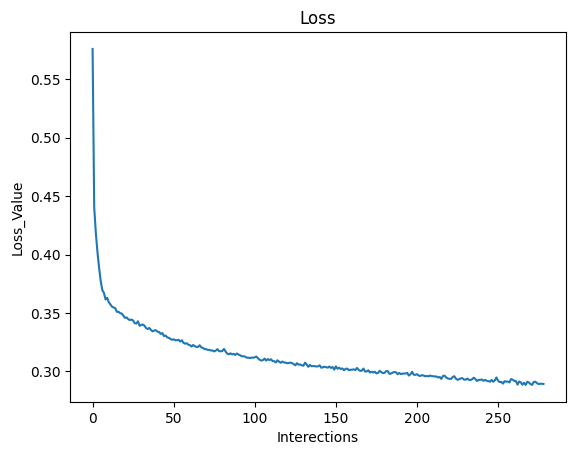

In [108]:
# We'll create a visual graph to see the loss curve of the model

plt.plot(model1.loss_curve_)
plt.xlabel("Interections")
plt.ylabel("Loss_Value")
plt.title("Loss")
plt.show()

In [109]:
# Now we'll predict the test dataset

prevision = model1.predict(X_test)
prevision

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
# We'll predict the test dataset and check the accuracy, precision, recall and f1-score

accuracy = accuracy_score(y_test, prevision)
precision = precision_score(y_test, prevision, average='weighted')
recall = recall_score(y_test, prevision, average='weighted')
f1 = f1_score(y_test, prevision, average='weighted')
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall {recall}, F1: {f1}')

Accuracy: 0.8444040036396724, Precision: 0.83633962108579, Recall 0.8444040036396724, F1: 0.8368257936152347


In [111]:
# In this second model we'll create a neural network with the library tensorflow, in which we must define each layer and the activation function

model2 = Sequential()
model2.add(Dense(units=48, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(units=24, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=48, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation='sigmoid'))

c:\Users\hsapa\Box Sync\Henrique\EIA\EIA - VSCode\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, batch_size=50)

Epoch 1/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7301 - loss: 0.5881
Epoch 2/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7806 - loss: 0.4518
Epoch 3/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8064 - loss: 0.4070
Epoch 4/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8065 - loss: 0.3910
Epoch 5/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 0.3800
Epoch 6/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8119 - loss: 0.3756
Epoch 7/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8139 - loss: 0.3732
Epoch 8/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8140 - loss: 0.3724
Epoch 9/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8171 - loss: 0.3693
Epoch 10/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8185 - loss: 0.3684
Epoch 11/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8195 - loss: 0.3630
Epoch 12/50
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [113]:
# As we used the activation function 'sigmoid' in the last layer, the output will be a value between 0 and 1
# and we must convert it to 0 or 1, so we'll use the function 'astype' to do this

prevision2 = model2.predict(X_test)

y_pred = (prevision2 > 0.5).astype('int32')
y_pred

447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [114]:
accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred, average='weighted')
recall_2 = recall_score(y_test, y_pred, average='weighted')
f1_2 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy_2}, Precision: {precision_2}, Recall {recall_2}, F1: {f1_2}')

Accuracy: 0.8301952824245817, Precision: 0.8210227412923632, Recall 0.8301952824245817, F1: 0.8229099930737332


In [115]:
# In this third model we'll use the TPOT library, that will create a model automatically, using genetic algorithms

tpot = TPOTClassifier(
    generations=10,
    population_size=100,
    offspring_size=100,
    mutation_rate=0.9,
    crossover_rate=0.1,
    scoring='accuracy',
    max_time_mins=5,
    random_state=0,
    early_stop=True,
    verbosity=2,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)
print("Melhor Modelo: ", tpot.fitted_pipeline_)

is_classifier
is_regressor
is_classifier
is_regressor


c:\Users\hsapa\Box Sync\Henrique\EIA\EIA - VSCode\tensorflow\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
c:\Users\hsapa\Box Sync\Henrique\EIA\EIA - VSCode\tensorflow\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor


c:\Users\hsapa\Box Sync\Henrique\EIA\EIA - VSCode\tensorflow\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                                                             
7.01 minutes have elapsed. TPOT will close down.                             
TPOT closed during evaluation in one generation.
                                                                             
                                                                             
TPOT closed prematurely. Will use the current best pipeline.
                                                                             
Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=9, min_samples_leaf=19, min_samples_split=18)
Melhor Modelo:  Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=19,
                                        min_samples_split=18,
                                        random_state=0))])


In [116]:
prevision3 = tpot.predict(X_test)

accuracy_3 = accuracy_score(y_test, prevision3)
precision_3 = precision_score(y_test, prevision3, average='weighted')
recall_3 = recall_score(y_test, prevision3, average='weighted')
f1_3 = f1_score(y_test, prevision3, average='weighted')
print(f'Accuracy: {accuracy_3}, Precision: {precision_3}, Recall {recall_3}, F1: {f1_3}')

Accuracy: 0.8553930146286834, Precision: 0.8497857051104291, Recall 0.8553930146286834, F1: 0.8442842485048763


In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [118]:
# In this fourth model we'll use the K-Nearest Neighbors algorithm, as it was considered the best model in the TPOT library

tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=16,min_samples_split=15,random_state=0)
model4 = tree.fit(X_train,y_train)
model4

DecisionTreeClassifier(max_depth=10, min_samples_leaf=16, min_samples_split=15,
                       random_state=0)

In [119]:
prevision4 = model4.predict(X_test)

accuracy_4 = accuracy_score(y_test, prevision4)
precision_4 = precision_score(y_test, prevision4, average='weighted')
recall_4 = recall_score(y_test, prevision4, average='weighted')
f1_4 = f1_score(y_test, prevision4, average='weighted')
print(f'Accuracy: {accuracy_4}, Precision: {precision_4}, Recall {recall_4}, F1: {f1_4}')

Accuracy: 0.8535731784139428, Precision: 0.8466579820060273, Recall 0.8535731784139428, F1: 0.8445880388301764


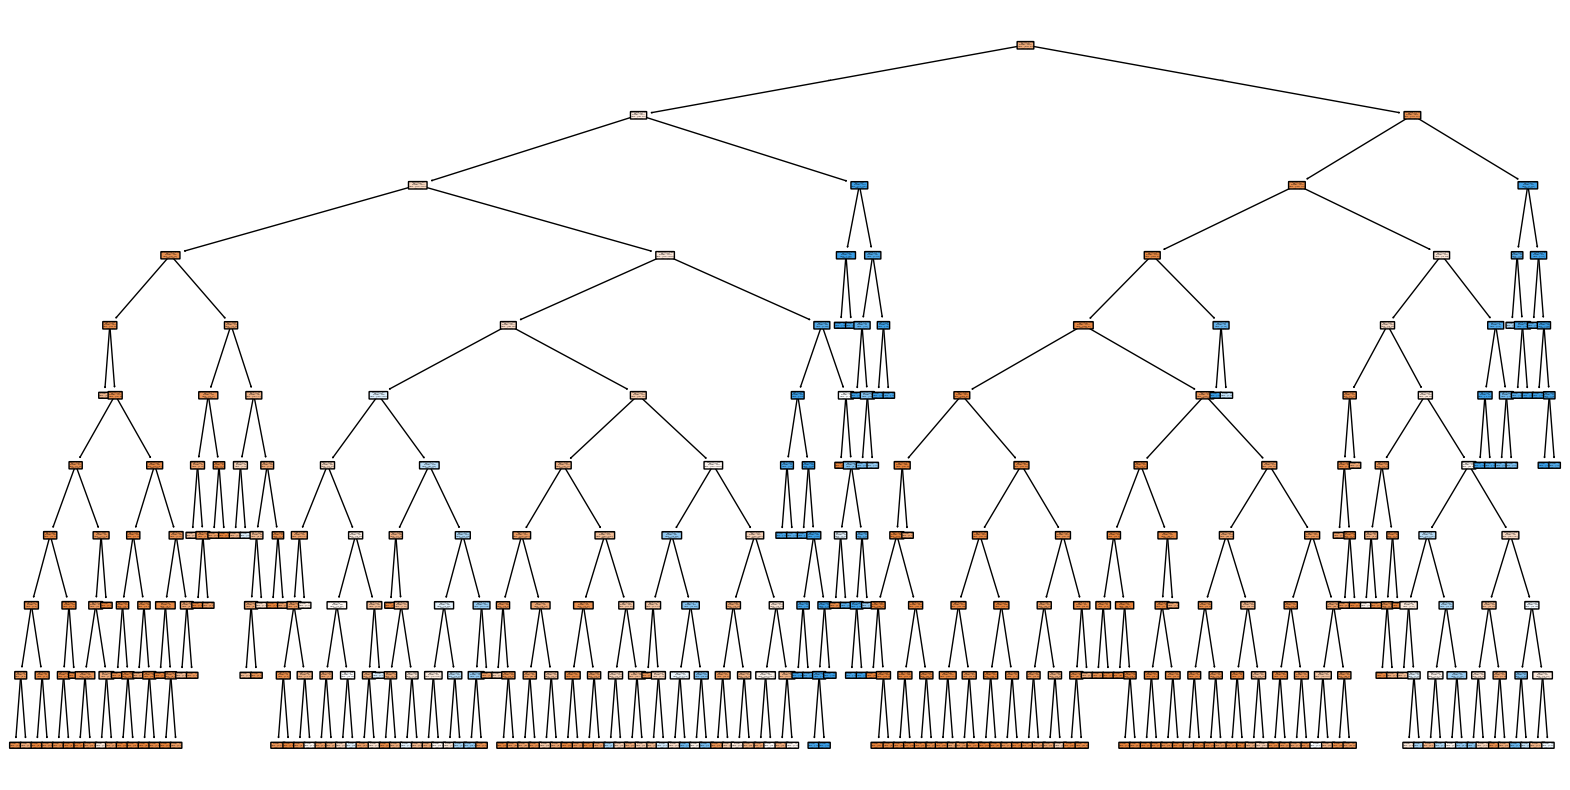

In [120]:
plt.figure(figsize=(20,10))
plot_tree(model4, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

In [121]:
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall {recall}, F1: {f1}')
print(f'Accuracy: {accuracy_2}, Precision: {precision_2}, Recall {recall_2}, F1: {f1_2}')
print(f'Accuracy: {accuracy_3}, Precision: {precision_3}, Recall {recall_3}, F1: {f1_3}')
print(f'Accuracy: {accuracy_4}, Precision: {precision_4}, Recall {recall_4}, F1: {f1_4}')

Accuracy: 0.8444040036396724, Precision: 0.83633962108579, Recall 0.8444040036396724, F1: 0.8368257936152347
Accuracy: 0.8301952824245817, Precision: 0.8210227412923632, Recall 0.8301952824245817, F1: 0.8229099930737332
Accuracy: 0.8553930146286834, Precision: 0.8497857051104291, Recall 0.8553930146286834, F1: 0.8442842485048763
Accuracy: 0.8535731784139428, Precision: 0.8466579820060273, Recall 0.8535731784139428, F1: 0.8445880388301764
